In [15]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
dir_images = '/content/drive/MyDrive/Colab Notebooks/damaged_car_dataset/image'
dir_bounding = '/content/drive/MyDrive/Colab Notebooks/damaged_car_dataset/bounding_box_annotations'

In [16]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/damaged_car_dataset/category_annotations/index.csv')

In [28]:
df.drop_duplicates(keep='first',inplace=True)

In [39]:
image = list(df[df['class']!='unknown'].image)
img=[]
for i in image:
  img.append((i.split('/'))[1].split('.')[0])

In [74]:
final_images = []
bounding = sorted(os.listdir(dir_bounding), key=lambda x: int(x.split(".")[0]))
for i in range(len(img)):
  for j in range(len(bounding)):
    if(img[i]==bounding[j].split('.')[0]):
      final_images.append(img[i])
      break

In [87]:
final_images[:10]

['1', '2', '3', '6', '8', '9', '10', '11', '12', '13']

In [80]:
images = []
for i in final_images:
  images.append(cv2.imread(os.path.join(dir_images,i) + '.jpeg'))

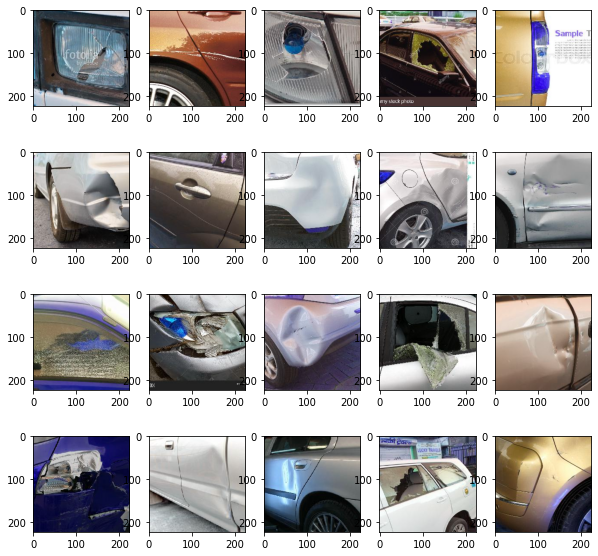

In [81]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(images[i])

In [3]:
import xml.etree.ElementTree as ET

def extract_boxes(filename):        
    # load and parse the file
    tree = ET.parse(filename)
    # get the root of the document
    root = tree.getroot()
    # extract each bounding box
    boxes = list()
    for box in root.findall('.//bndbox'):
        xmin = int(box.find('xmin').text)
        ymin = int(box.find('ymin').text)
        xmax = int(box.find('xmax').text)
        ymax = int(box.find('ymax').text)
        coors = [xmin, ymin, xmax, ymax]
        boxes.append(coors)
        
    # extract image dimensions
    width = int(root.find('.//size/width').text)
    height = int(root.find('.//size/height').text)
    return boxes, width, height

In [118]:
bounding_box_paths = []
final_images_paths = []
for i in final_images:
  bounding_box_paths.append(os.path.join(dir_bounding,i) + '.xml')
  final_images_paths.append(os.path.join(dir_images,i) + '.jpeg')

In [92]:
ccd = []
for i in bounding_box_paths:
  ccd.append((extract_boxes(i)[0]))

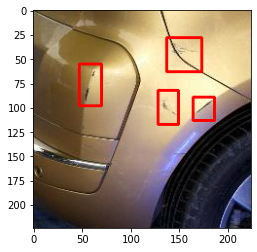

In [180]:
img = cv2.imread(final_images_paths[19])
rect = cv2.rectangle(img, (ccd[19][0][0], ccd[19][0][1]), (ccd[19][0][2], ccd[19][0][3]), (255,0,0), 2)
rect = cv2.rectangle(rect, (ccd[19][1][0], ccd[19][1][1]), (ccd[19][1][2], ccd[19][1][3]), (255,0,0), 2)
rect = cv2.rectangle(rect, (ccd[19][2][0], ccd[19][2][1]), (ccd[19][2][2], ccd[19][2][3]), (255,0,0), 2)
rect = cv2.rectangle(rect, (ccd[19][3][0], ccd[19][3][1]), (ccd[19][3][2], ccd[19][3][3]), (255,0,0), 2)
plt.imshow(rect)

In [181]:
box = []
for i in range(len(final_images_paths)):
  img = cv2.imread(final_images_paths[i])
  if len(ccd[i])==1:
    box.append(cv2.rectangle(img, (ccd[i][0][0], ccd[i][0][1]), (ccd[i][0][2], ccd[i][0][3]), (255,0,0), 2))
  elif len(ccd[i])==2:
    rect = cv2.rectangle(img, (ccd[i][0][0], ccd[i][0][1]), (ccd[i][0][2], ccd[i][0][3]), (255,0,0), 2)
    rect = cv2.rectangle(rect, (ccd[i][1][0], ccd[i][1][1]), (ccd[i][1][2], ccd[i][1][3]), (255,0,0), 2)
    box.append(rect)
  elif len(ccd[i])==3:
    rect = cv2.rectangle(img, (ccd[i][0][0], ccd[i][0][1]), (ccd[i][0][2], ccd[i][0][3]), (255,0,0), 2)
    rect = cv2.rectangle(rect, (ccd[i][1][0], ccd[i][1][1]), (ccd[i][1][2], ccd[i][1][3]), (255,0,0), 2)
    rect = cv2.rectangle(rect, (ccd[i][2][0], ccd[i][2][1]), (ccd[i][2][2], ccd[i][2][3]), (255,0,0), 2)  
    box.append(rect)
  elif len(ccd[i])==4:
    rect = cv2.rectangle(img, (ccd[i][0][0], ccd[i][0][1]), (ccd[i][0][2], ccd[i][0][3]), (255,0,0), 2)
    rect = cv2.rectangle(rect, (ccd[i][1][0], ccd[i][1][1]), (ccd[i][1][2], ccd[i][1][3]), (255,0,0), 2)
    rect = cv2.rectangle(rect, (ccd[i][2][0], ccd[i][2][1]), (ccd[i][2][2], ccd[i][2][3]), (255,0,0), 2)
    rect = cv2.rectangle(rect, (ccd[i][3][0], ccd[i][3][1]), (ccd[i][3][2], ccd[i][3][3]), (255,0,0), 2)
    box.append(rect)
  else:
    box.append(img)

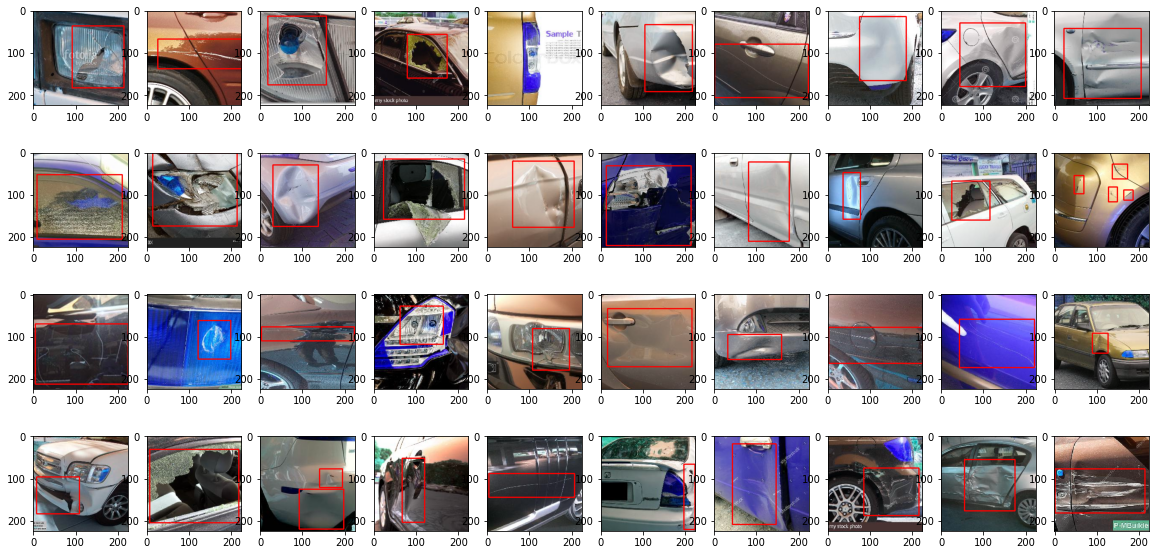

In [184]:
plt.figure(figsize=(20,10))
for i in range(40):
  plt.subplot(4,10,i+1)
  plt.imshow(box[i])